# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Afek 5192
# student 2: Shani 1042

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import pandas as pd
import numpy as np
import math 
import statistics
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import sklearn.feature_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, accuracy_score

In [3]:
K_FOLD_CROSS_VALIDATION = 6

In [4]:
train_data = pd.read_csv('data/titanic_train.csv')
test_data = pd.read_csv('data/titanic_test.csv')

# Display the first 5 rows of the datasets
print("Train Set:")
display(train_data.head())

print("Test Set:")
display(test_data.head())

print("Train Set Statistics:")
display(train_data.describe())

print("Test Set Statistics:")
display(test_data.describe())

Train Set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


Test Set:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


Train Set Statistics:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


Test Set Statistics:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.363128,0.675978,30.366983,0.502793,0.368715,31.507239,0.351955,0.340782
std,0.812116,0.469321,12.246691,1.278053,0.819923,49.254330,0.639640,0.475302
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,12.000000,0.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,27.825000,1.000000,1.000000
max,3.000000,1.000000,71.000000,8.000000,5.000000,263.000000,3.000000,1.000000


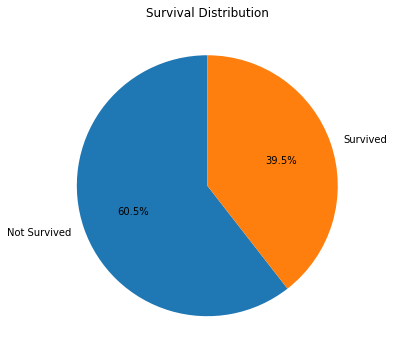

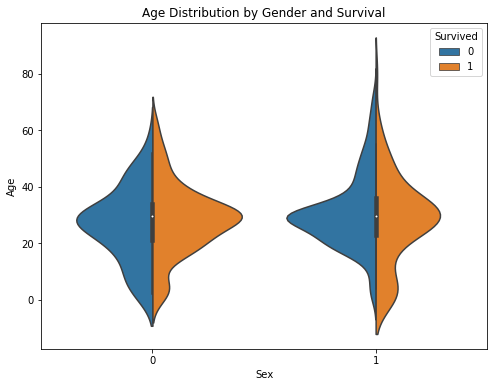

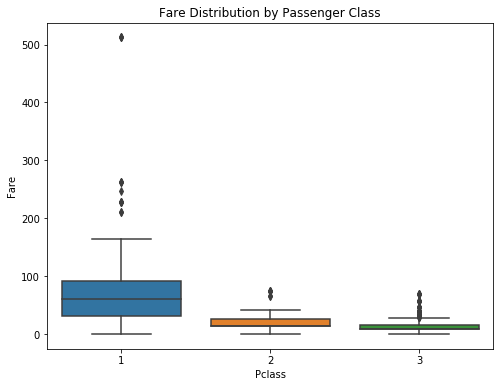

C:\Users\shani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\shani\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


<Figure size 576x576 with 0 Axes>

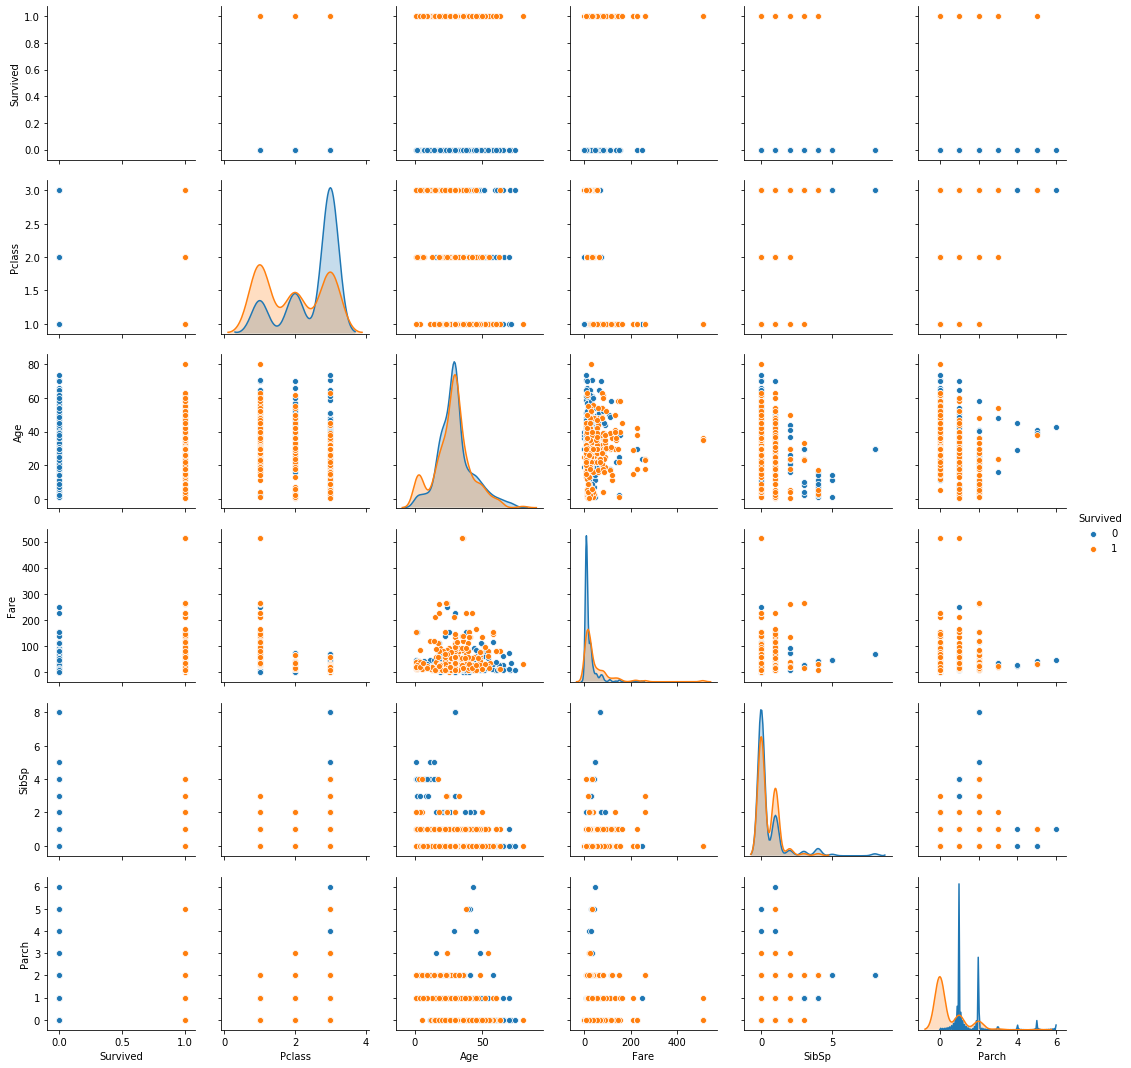

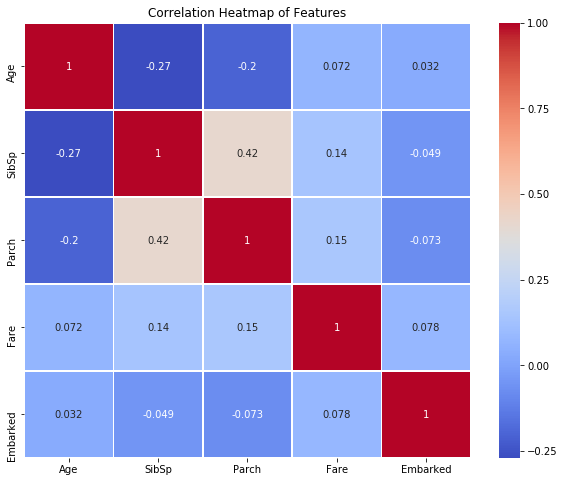

In [5]:
train_data['Survived'] = train_data['Survived'].astype('category')
train_data['Pclass'] = train_data['Pclass'].astype('category')
train_data['Sex'] = train_data['Sex'].astype(str)

# 1. Pie chart for survival distribution
survived_counts = train_data['Survived'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(survived_counts, labels=['Not Survived', 'Survived'], autopct='%1.1f%%', startangle=90)
plt.title('Survival Distribution')
plt.show()

# 2. Age distribution by gender using violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Sex', y='Age', data=train_data, hue='Survived', split=True)
plt.title('Age Distribution by Gender and Survival')
plt.show()

# 3. Fare distribution by class
plt.figure(figsize=(8, 6))
sns.boxplot(x='Pclass', y='Fare', data=train_data)
plt.title('Fare Distribution by Passenger Class')
plt.show()

# 4. Pair plot for selected features
plt.figure(figsize=(8, 8))
sns.pairplot(train_data[['Survived', 'Pclass', 'Age', 'Fare', 'SibSp', 'Parch']].dropna(), hue='Survived')
plt.show()

# 5. Correlation heatmap (Optional but useful for understanding relationships)
plt.figure(figsize=(10, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Features')
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

In [6]:
# load dataset

def load_dataset(file_name, category_col_name):
    df = pd.read_csv(file_name)
    X = df.drop(columns=[category_col_name])
    y = df[category_col_name]
    
    return X, y

In [7]:
# Define Feature Engineering Methods

# Feature Scaling
def feature_scaling(X_train, X_val, scaler):
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    return X_train_scaled, X_val_scaled

# Dimensionality Reduction
def dimensionality_reduction(X_train, X_val, n_components):
    pca = PCA(n_components=n_components)
    X_train_reduced = pca.fit_transform(X_train)
    X_val_reduced = pca.transform(X_val)
    return X_train_reduced, X_val_reduced

In [8]:
# Define Models and Hyperparameters

# KNN Pipeline with Hyperparameters
def knn_pipeline(X, y, param_grid):
    pipeline = Pipeline([
        ('knn', KNeighborsClassifier())
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=K_FOLD_CROSS_VALIDATION, scoring='f1', iid=False)
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_params, best_score

# Decision Tree Pipeline with Hyperparameters
def decision_tree_pipeline(X, y, param_grid):
    pipeline = Pipeline([
        ('tree', DecisionTreeClassifier(criterion='entropy'))
    ])
    grid_search = GridSearchCV(pipeline, param_grid, cv=K_FOLD_CROSS_VALIDATION, scoring='f1', iid=False)
    grid_search.fit(X, y)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_
    
    return best_params, best_score


In [9]:
# Define Parameter Grids

# Hyperparameters for KNN
knn_param_grid = {
    'knn__n_neighbors': [3, 5, 7, 9],
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan']
}

# Hyperparameters for Decision Tree
tree_param_grid = {
    'tree__max_depth': [3, 5, 7, 10],
    'tree__min_samples_split': [2, 5, 10],
    'tree__min_samples_leaf': [1, 2, 4]
}

In [10]:
# Create Matrix of Results

# Load dataset and preprocess
file_name = 'data/titanic_train.csv'
category_col_name = 'Survived'
X, y = load_dataset(file_name, category_col_name)

# Initialize result matrices
knn_results = []
tree_results = []

# Create combinations of feature engineering methods
for scaler in [StandardScaler(), MinMaxScaler()]:
    X_scaled, X_val = feature_scaling(X, X, scaler)
    for n_components in [2, 5]:
        X_train_reduced, X_val_reduced = dimensionality_reduction(X_scaled, X_val, n_components)
        
        # Evaluate KNN
        knn_params, knn_score = knn_pipeline(X_train_reduced, y, knn_param_grid)
        knn_results.append({**knn_params, **{'Scaling': scaler.__class__.__name__, 'PCA Components': n_components, 'Score': knn_score}})

        # Evaluate Decision Tree
        tree_params, tree_score = decision_tree_pipeline(X_train_reduced, y, tree_param_grid)
        tree_results.append({**tree_params, **{'Scaling': scaler.__class__.__name__, 'PCA Components': n_components, 'Score': tree_score}})


In [11]:
# Show Results

# Convert results to DataFrame
knn_results_df = pd.DataFrame(knn_results)
tree_results_df = pd.DataFrame(tree_results)

print("dataframe of KNN Results:")
print(knn_results_df)

print("dataframe of Decision Tree Results:")
print(tree_results_df)

# Retrieve the row with the maximum value in the 'Score' column from both dataframes
knn_max_index = knn_results_df['Score'].idxmax()
tree_max_index = tree_results_df['Score'].idxmax()

knn_max_row = knn_results_df.loc[knn_max_index]
tree_max_row = tree_results_df.loc[tree_max_index]


print("Row with the highest score KNN:")
print(knn_max_row)

print("Row with the highest score Decision Tree:")
print(tree_max_row)

dataframe of KNN Results:
   PCA Components         Scaling     Score knn__metric  knn__n_neighbors  \
0               2  StandardScaler  0.666117   euclidean                 5   
1               5  StandardScaler  0.739005   euclidean                 7   
2               2    MinMaxScaler  0.716881   euclidean                 7   
3               5    MinMaxScaler  0.724701   euclidean                 3   

  knn__weights  
0      uniform  
1      uniform  
2      uniform  
3      uniform  
dataframe of Decision Tree Results:
   PCA Components         Scaling     Score  tree__max_depth  \
0               2  StandardScaler  0.639281                5   
1               5  StandardScaler  0.675832                5   
2               2    MinMaxScaler  0.697478                7   
3               5    MinMaxScaler  0.706620                3   

   tree__min_samples_leaf  tree__min_samples_split  
0                       1                        2  
1                       4               

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [12]:
# Load the training data
train_file_name = 'data/titanic_train.csv'
category_col_name = 'Survived'
X_train, y_train = load_dataset(train_file_name, category_col_name)

# Load the test data
test_file_name = 'data/titanic_test.csv'
X_test, y_test = load_dataset(test_file_name, category_col_name)

# Train the best KNN model on the training set
def train_final_knn(X_train, y_train):

    pipeline = Pipeline([
        ('scaler', StandardScaler()),  # Best scaler from previous experiment
        ('pca', PCA(n_components=knn_max_row['PCA Components'])),  # Best PCA components
        ('knn', KNeighborsClassifier(
            n_neighbors=knn_max_row['knn__n_neighbors'],
            metric=knn_max_row['knn__metric'],
            weights=knn_max_row['knn__weights'])
        )
    ])
    
    # Train the final model
    pipeline.fit(X_train, y_train)
    
    return pipeline
    
    # Train the final model
    pipeline.fit(X_train, y_train)
    
    return pipeline

# Train the final KNN model
final_knn_model = train_final_knn(X_train, y_train)

# Make predictions on the test set using the KNN model
knn_pred = final_knn_model.predict(X_test)

## Part 5 - Apply on test and show model performance estimation

In [13]:
test_file_name = 'data/titanic_test.csv'
X_test_data, y_test_data = load_dataset(test_file_name, category_col_name)
final_model = train_final_knn(X_train, y_train)  # Train the final KNN model

# Make predictions using the final model
y_test_pred = final_model.predict(X_test_data)

# First 10 predictions on the test set
print("First 5 test predictions:")
print(y_test_pred[:5])

# Corresponding true labels
print("First 5 actual labels:")
print(y_test_data[:5])

First 5 test predictions:
[0 0 0 1 0]
First 5 actual labels:
0    0
1    0
2    0
3    0
4    1
Name: Survived, dtype: int64


In [14]:
# Calculate and print performance metrics
print("Test Set Performance Evaluation:")

# Accuracy
accuracy = accuracy_score(y_test_data, y_test_pred)
print(f"Accuracy: {accuracy}")

# Detailed Classification
print("Classification Report:")
print(classification_report(y_test_data, y_test_pred))

Test Set Performance Evaluation:
Accuracy: 0.8268156424581006
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.86      0.87       118
           1       0.73      0.77      0.75        61

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179

